In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#read data in pandas
ride = "raw_data/ride_data.csv"
city = "raw_data/city_data.csv"

ride_df = pd.read_csv(ride)
city_df = pd.read_csv(city)

In [44]:
pyber_df = pd.merge(ride_df, city_df, how='inner', on='city')
urban_df = pyber_df.loc[pyber_df['type']=='Urban',:]
suburban_df = pyber_df.loc[pyber_df['type']=='Suburban',:]
rural_df = pyber_df.loc[pyber_df['type']=='Rural',:]

In [106]:
#suburban counts
urban_c = urban_df.groupby('city')
urban_fare = urban_c['fare'].mean()
urban_rides = urban_c['fare'].count()
urban_driver = urban_c['driver_count'].unique()

#suburban counts
suburban_c = suburban_df.groupby('city')
sban_fare = suburban_c['fare'].mean()
sban_rides = suburban_c['driver_count'].count()
sban_driver = suburban_c['driver_count'].unique()

#rural counts
rural_c = rural_df.groupby('city')
rural_fare = rural_c['fare'].mean()
rural_rides = rural_c['driver_count'].count()
rural_driver = rural_c['driver_count'].unique()

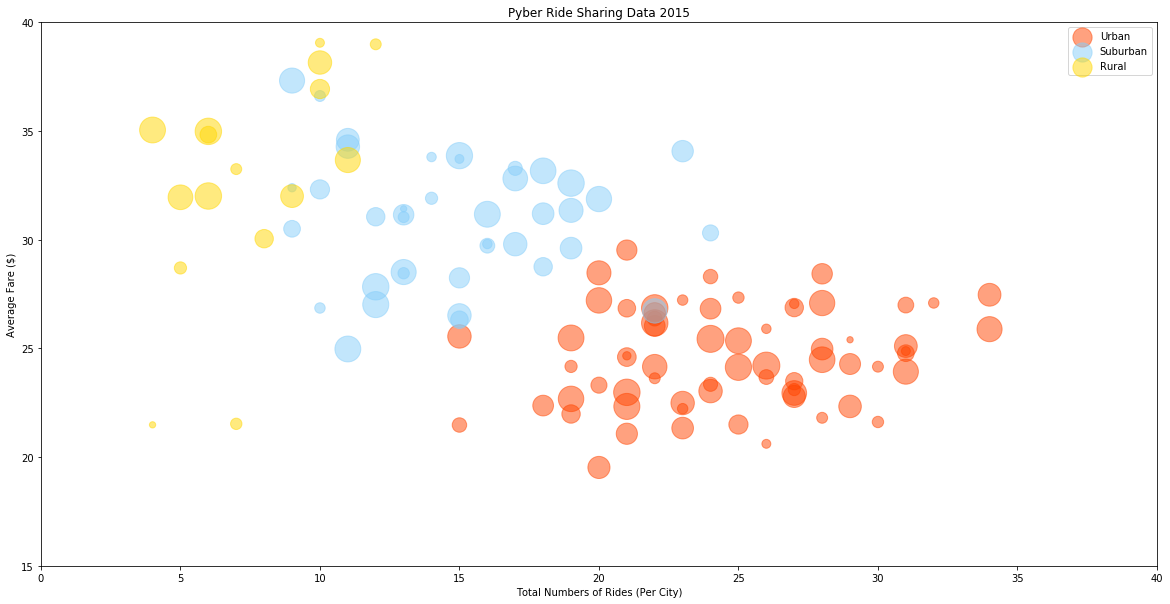

In [143]:
plt.figure(figsize=(20,10))

plt.scatter(urban_rides, urban_fare, s = city_df['driver_count']*10, label='Urban', color='orangered', marker="o", alpha=.5)

plt.scatter(sban_rides, sban_fare, s= city_df['driver_count']*10, label='Suburban', color='lightskyblue', marker="o", alpha=.5)

plt.scatter(rural_rides, rural_fare, s = city_df['driver_count']*10, label='Rural', color='gold', marker="o", alpha=.5)

plt.legend(labels=["Urban", "Suburban", "Rural"], loc="best") 

plt.xlim(0, 40)
plt.ylim(15,40)


plt.title("Pyber Ride Sharing Data 2015")
plt.xlabel("Total Numbers of Rides (Per City)")
plt.ylabel("Average Fare ($)")

plt.show()

In [159]:
piecity_df = pyber_df.groupby('type')
piefare = piecity_df['fare'].sum()

pierides = piecity_df['type'].count()

piedrivers = piecity_df['driver_count'].sum()

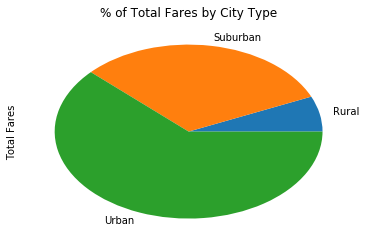

In [166]:
farepie = piefare.plot(kind="pie", y=type, title=("% of Total Fares by City Type"))
farepie.set_ylabel("Total Fares")
plt.show()

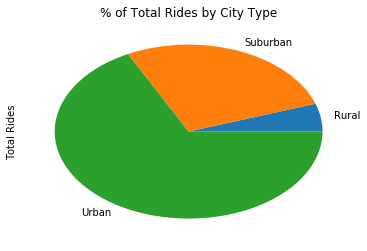

In [175]:
ridepies = pierides.plot(kind="pie", y=type, title=("% of Total Rides by City Type"))
ridepies.set_ylabel("Total Rides")
plt.show()

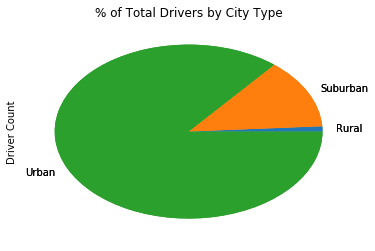

In [162]:
driverpies = piedrivers.plot(kind="pie", y=type, title=("% of Total Drivers by City Type"))
driverpies.set_ylabel("Driver Count")
plt.show()